In [1]:
import pandas as pd

## Will need to import these csv files to Github
data = 'https://raw.githubusercontent.com/jeremy-jewett/Unit_2_Project/master/Data/'
df1 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2017_Season4.csv', encoding='latin-1')
df2 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2018_Season1.csv', encoding='latin-1')
df3 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2018_Season2.csv', encoding='latin-1')
df4 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2018_Season3.csv', encoding='latin-1')
df5 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2018_Season4.csv', encoding='latin-1')
df6 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2019_Season1.csv', encoding='latin-1')
df7 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2019_Season2.csv', encoding='latin-1')
df8 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2019_Season3.csv', encoding='latin-1')
df9 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2019_Season4.csv', encoding='latin-1')
df10 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2020_Season1.csv', encoding='latin-1')
df11 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2020_Season2.csv', encoding='latin-1')
df12 = pd.read_csv(data + 'series_standings_DIRTcar_UMP_Modified_Series_2020_Season3.csv', encoding='latin-1')

In [2]:
# Assigning the season and year

df1['year'], df1['season'] = 2017, 4
df2['year'], df2['season'] = 2018, 1
df3['year'], df3['season'] = 2018, 2
df4['year'], df4['season'] = 2018, 3
df5['year'], df5['season'] = 2018, 4
df6['year'], df6['season'] = 2019, 1
df7['year'], df7['season'] = 2019, 2
df8['year'], df8['season'] = 2019, 3
df9['year'], df9['season'] = 2019, 4
df10['year'], df10['season'] = 2020, 1
df11['year'], df11['season'] = 2020, 2
df12['year'], df12['season'] = 2020, 3

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

In [4]:
df.shape

(15679, 21)

In [5]:
df.columns

Index(['position', 'name', 'points', 'dropped', 'clubname', 'countrycode',
       'irating', 'avgfinish', 'topfive', 'starts', 'lapslead', 'wins',
       'incidents', 'division', 'weekscounted', 'laps', 'poles', 'avgstart',
       'custid', 'year', 'season'],
      dtype='object')

In [6]:
# Engineering a feature to get the same amount of players from each season.
df['position_value'] = pd.value_counts(df['position'])

In [7]:
# dropping feature, as it is no longer needed after filtering.

df_filtered = df[df['position_value'] == 12]
df_filtered = df_filtered.drop('position_value', axis=1)

In [8]:
df_filtered.columns

Index(['position', 'name', 'points', 'dropped', 'clubname', 'countrycode',
       'irating', 'avgfinish', 'topfive', 'starts', 'lapslead', 'wins',
       'incidents', 'division', 'weekscounted', 'laps', 'poles', 'avgstart',
       'custid', 'year', 'season'],
      dtype='object')

In [9]:
# Checking for null values

df_filtered.isna().sum()

position        0
name            0
points          0
dropped         0
clubname        0
countrycode     0
irating         0
avgfinish       0
topfive         0
starts          0
lapslead        0
wins            0
incidents       0
division        0
weekscounted    0
laps            0
poles           0
avgstart        0
custid          0
year            0
season          0
dtype: int64

In [10]:
# Getting rid of one-race drivers

df_filtered=df_filtered[df_filtered['weekscounted'] > 1]

In [11]:
df_filtered['weekscounted'].value_counts()

2     2381
3     1582
8     1096
4     1044
5      762
6      530
7      356
9       94
10       1
Name: weekscounted, dtype: int64

In [12]:
df_filtered.shape

(7846, 21)

In [13]:
per_race_transition = ['points','wins','incidents', 'poles', 'lapslead', 'topfive']

for x in per_race_transition:
    df_filtered[x]
    newcolname = (x + '_per_race')
    df_filtered[newcolname] = df_filtered[x] / df_filtered['starts']
    
    
df_filtered.drop(per_race_transition, axis=1)
df_filtered = df_filtered.drop(['position','dropped', 'name', 'clubname', 'countrycode', 'custid'], axis=1)

In [14]:
df_filtered.columns

Index(['points', 'irating', 'avgfinish', 'topfive', 'starts', 'lapslead',
       'wins', 'incidents', 'division', 'weekscounted', 'laps', 'poles',
       'avgstart', 'year', 'season', 'points_per_race', 'wins_per_race',
       'incidents_per_race', 'poles_per_race', 'lapslead_per_race',
       'topfive_per_race'],
      dtype='object')

In [15]:
# The baseline

df_filtered['avgstart'].mean()

6.400458832526128

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


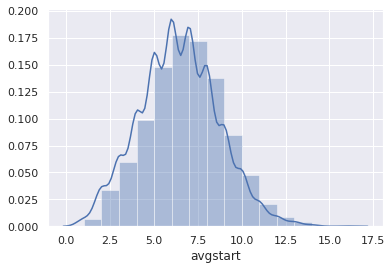

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df_filtered
sns.set(color_codes=True)
sns.distplot(df_filtered['avgstart'], bins=15);

In [17]:
import plotly.express as px
fig = px.scatter(x=df_filtered['incidents_per_race'], y=df_filtered['avgstart'])
fig.show()

In [18]:
# Now, on to predicting the starting spot.



In [19]:
train = df_filtered[df_filtered['year'] == 2017 | 2018]
val = df_filtered[df_filtered['year'] == 2019]
test = df_filtered[df_filtered['year'] ==2020]

target = 'avgstart'
features = df_filtered.columns.drop('avgstart')

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]


In [20]:
# I'm going to work with linear regression, as the values are not strictly categorical.
# Note that the decimal will need rounded.
!pip install --upgrade category_encoders
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [21]:
px.scatter(
    train,
    x='incidents_per_race',
    y='avgstart',
    text='avgstart',
    title='',
    trendline='ols',
)

In [22]:
px.scatter(
    train,
    x='irating',
    y='avgstart',
    text='avgstart',
    title='iRating',
    trendline='ols',
)

In [26]:
# building a pipeline using a target encoder and classification
linear_regression = LinearRegression()

linear_regression.fit(X_train[['incidents_per_race']], y_train)
y_pred = linear_regression.predict(X_train[['incidents_per_race']])

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_val, y_pred)
print('The Mean Absolute Error of the Validation set is:', mae)
print('The R^2 score for the same is:', r2_score(y_val, y_pred))

The Mean Absolute Error of the Validation set is: 1.7059617208557845
The R^2 score for the same is: 0.03870552150888007


In [28]:
# and another using Gradient Boosting


from xgboost import XGBRegressor

gradient = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', random_state = 42, n_jobs=-1)
)

gradient.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=200, n_jobs=-1,
                              nthread=None, objective='reg:squarederror',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosit

In [29]:
# looking at a couple partial dependence plots.
# Do the incidents per race contribute to show how the drivers start?
!pip install pdpbox
# Imported the font manager, as below indicates:
# "Font family ['Arial'] not found".  Didn't help as intended.
import matplotlib.font_manager
from pdpbox.pdp import pdp_isolate, pdp_plot

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


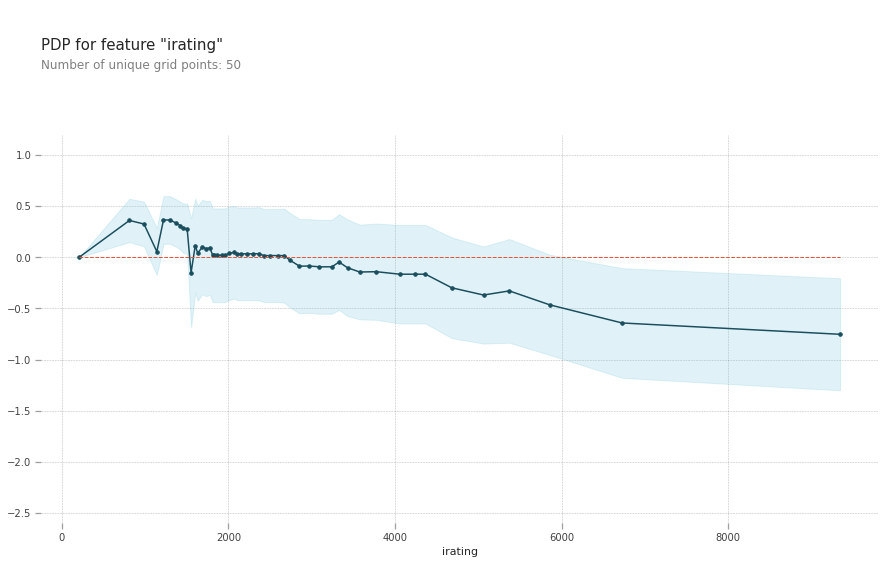

In [30]:
feature = 'irating'


isolated = pdp_isolate(
    model=gradient, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature, 
    num_grid_points=50
)

pdp_plot(isolated, feature_name=feature);

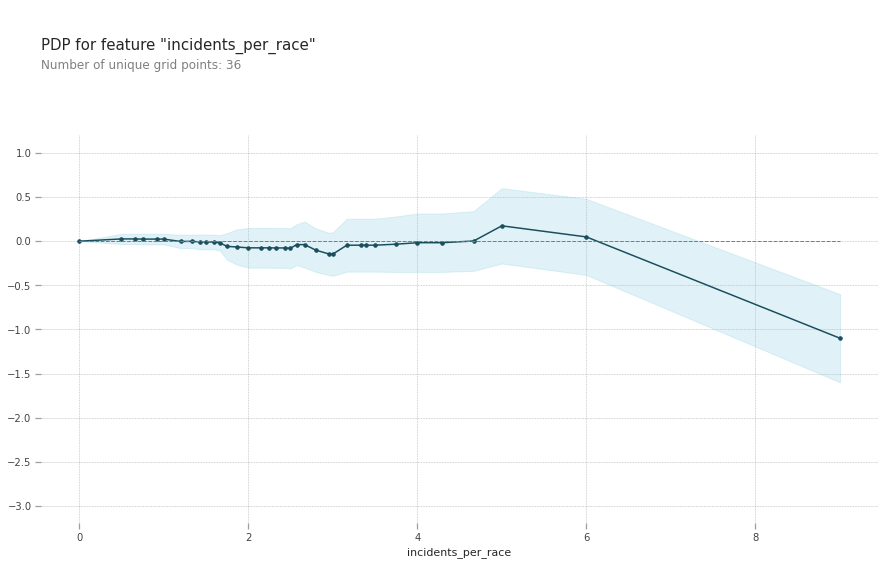

In [31]:
feature = 'incidents_per_race'


isolated = pdp_isolate(
    model=gradient, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature, 
    num_grid_points=50
)

pdp_plot(isolated, feature_name=feature);

In [32]:
print('Test Accuracy:', gradient.score(X_val, y_val))

Test Accuracy: 0.7747219950948462


In [33]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

In [34]:
transformers = make_pipeline(
    ce.OrdinalEncoder(),
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

In [35]:
permuter = PermutationImportance(
    gradient, 
    scoring='neg_mean_absolute_error', 
    n_iter=5, 
    random_state=42 
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('ordinalencoder',
                                                 OrdinalEncoder(cols=[],
                                                                drop_invariant=False,
                                                                handle_missing='value',
                                                                handle_unknown='value',
                                                                mapping=[],
                                                                return_df=True,
                                                                verbose=0)),
                                                ('xgbregressor',
                                                 XGBRegressor(base_score=0.5,
                                                              booster='gbtree',
                                                     

In [36]:
import graphviz
from sklearn.tree import export_graphviz

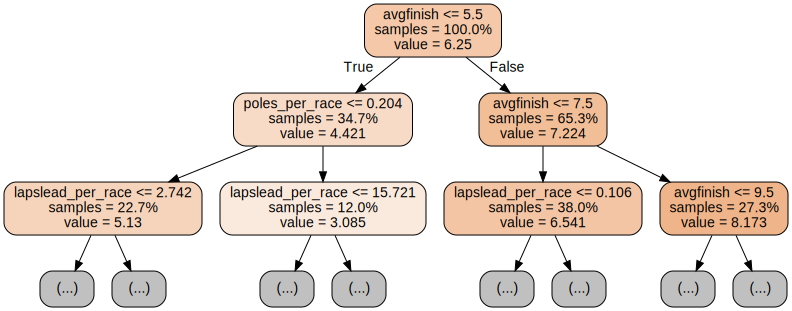

In [37]:
# Viewing the top branches of the decision tree.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

features = ['points', 'irating', 'avgfinish', 'topfive', 'starts', 'lapslead',
       'wins', 'incidents', 'division', 'weekscounted', 'laps', 'poles',
       'year', 'season', 'points_per_race', 'wins_per_race',
       'incidents_per_race', 'poles_per_race', 'lapslead_per_race',
       'topfive_per_race']
model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)
dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=2, 
                           feature_names=features, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

In [38]:
permuter = PermutationImportance(
    model, 
    scoring='neg_mean_absolute_error', 
    n_iter=5, 
    random_state=42 
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=42,
                                                      splitter='bes

In [39]:
# This shows the results of the decision tree regression model, entitled 'model'
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=features 
)

Weight,Feature
1.8529 ± 0.0635,avgfinish
0.7971 ± 0.0315,lapslead_per_race
0.6784 ± 0.0197,points_per_race
0.6141 ± 0.0140,irating
0.4979 ± 0.0348,laps
0.4663 ± 0.0304,points
0.4218 ± 0.0158,topfive_per_race
0.4067 ± 0.0229,poles_per_race
0.3789 ± 0.0219,incidents_per_race
0.2705 ± 0.0268,division


In [40]:
permuter = PermutationImportance(
    gradient, 
    scoring='neg_mean_absolute_error', 
    n_iter=5, 
    random_state=42 
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('ordinalencoder',
                                                 OrdinalEncoder(cols=[],
                                                                drop_invariant=False,
                                                                handle_missing='value',
                                                                handle_unknown='value',
                                                                mapping=[],
                                                                return_df=True,
                                                                verbose=0)),
                                                ('xgbregressor',
                                                 XGBRegressor(base_score=0.5,
                                                              booster='gbtree',
                                                     

In [41]:
print('Validation Accuracy:', gradient.score(X_val, y_val))
print('Test Accuracy:', gradient.score(X_test, y_test))

Test Accuracy: 0.7747219950948462
Test Accuracy: 0.6024460901460817


In [42]:
print('Validation Accuracy:', model.score(X_val, y_val))
print('Test Accuracy:', model.score(X_test, y_test))

Test Accuracy: 1.0
Test Accuracy: 0.2526869046324004


In [ ]:
random_state = 42

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, 
    feature_names=features 
)